In [460]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [461]:
# Load the dataset
palm = pd.read_csv('palm_ffb.csv')

In [462]:
# Check the first 10 rows of the dataset
palm.head(10)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
5,01.06.2008,532.5,27.116667,21.4,35.5,182.3,24,829817.5676,1.48
6,01.07.2008,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66
7,01.08.2008,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71
8,01.09.2008,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62
9,01.10.2008,565.3,27.358065,22.1,33.9,217.5,24,765090.8602,1.86


In [463]:
# Display data frame shape in rows and columns
print('Data Frame shape = ' ,palm.shape)

Data Frame shape =  (130, 9)


In [464]:
# Display data frame size
print('Number of rows times number of columns')
print('Data Frame size = ', palm.size)

Number of rows times number of columns
Data Frame size =  1170


In [465]:
# Display data types for each of the attributes in the dataset
palm.dtypes

Date              object
SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
dtype: object

In [466]:
# Display data frame info
print(palm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB
None


In [467]:
# Analyze Descriptive Statistics
palm.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


# Data Pre-processing

### CHECK MISSING VALUES

In [468]:
# Check misisng/null values in the dataset
missing_values_count = palm.isna().sum()

# Display the missing/null values in the 9 attributes
missing_values_count[0:9]

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [469]:
# Check the total missing values in our data
total_cells = np.product(palm.shape)
total_missing = missing_values_count.sum()

# Percentage of missing data
print('Percentage of missing data: ', (total_missing/total_cells)*100 , '%')

Percentage of missing data:  0.0 %


<AxesSubplot:>

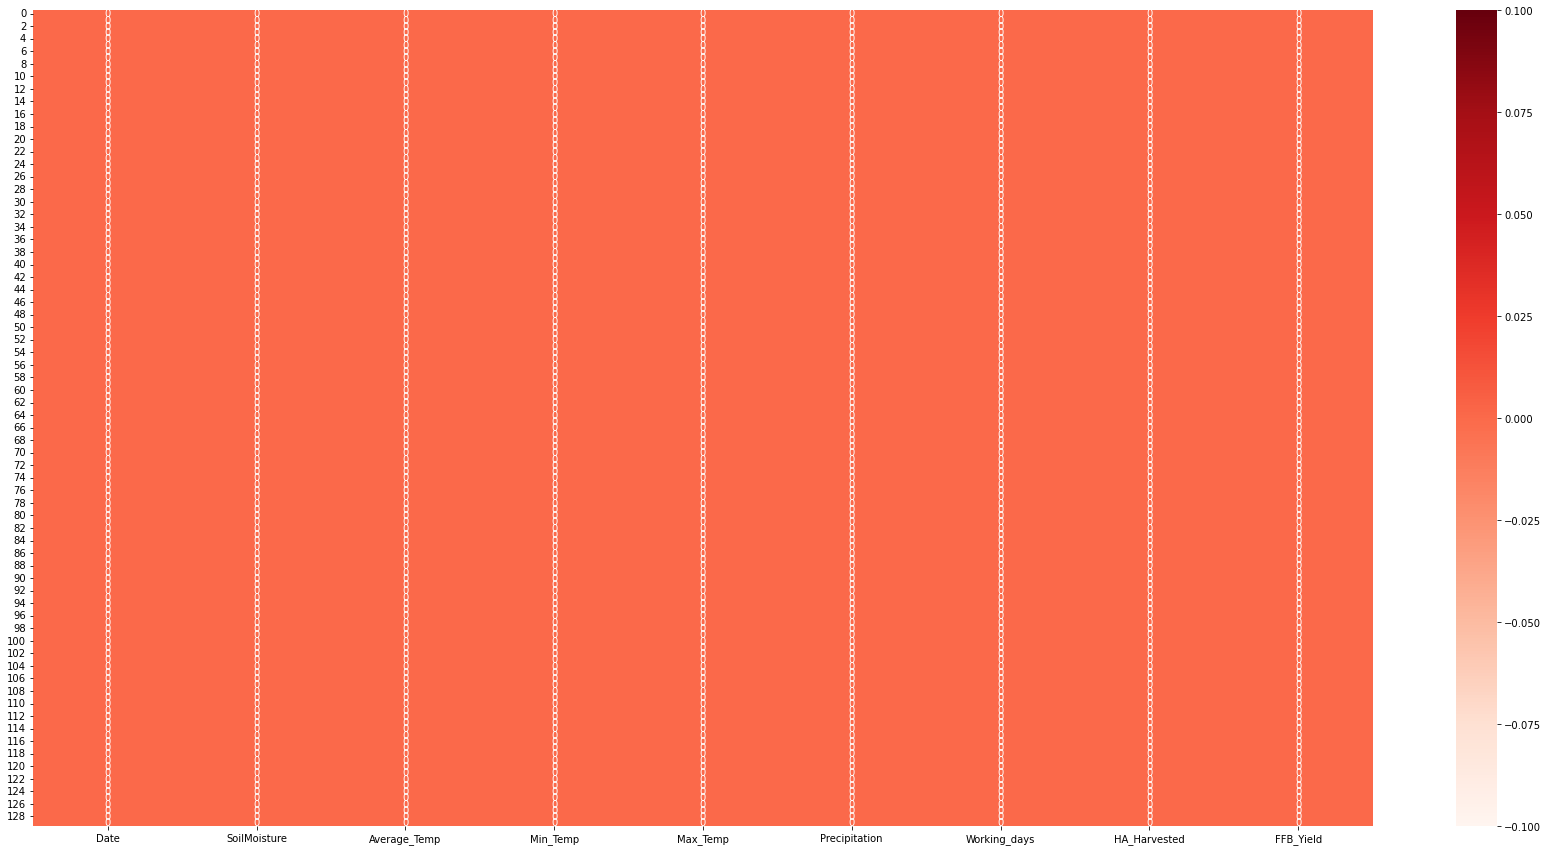

In [470]:
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(palm.isnull(), annot=True,cmap="Reds")

### CHECK DUPLICATE VALUES

In [471]:
# Check for duplicate values

print("There are {} duplicated values in data frame".format(palm.duplicated().sum()))

There are 0 duplicated values in data frame


### CHECK NUMERICAL/DISCRETE VARIABLES

In [472]:
# Display the list of numerical variables
num_variables = [var for var in palm.columns if palm[var].dtypes != 'O']
print('Number of numerical variables in the dataset: ', len(num_variables))

Number of numerical variables in the dataset:  8


In [473]:
# Check number of discrete variables
discrete_variables = [var for var in num_variables if len(palm[var].unique())<20]

print('Number of discrete variables in the dataset: ', len(discrete_vars))
print('Discrete variables in the dataset: ',(discrete_variables))

Number of discrete variables in the dataset:  1
Discrete variables in the dataset:  ['Working_days']


In [474]:
palm[discrete_variables].head(10)

,Working_days
0,25
1,23
2,25
3,25
4,25
5,24
6,26
7,26
8,25
9,24


## Skewness for each of the attributes

In [475]:
print("Skewness for the attributes below:- \n")

skewValue = df.skew(axis=0)
print(skewValue)

Skewness for the attributes below:- 

SoilMoisture    -0.394336
Average_Temp    -0.340606
Min_Temp        -1.121358
Max_Temp        -0.215635
Precipitation    0.526227
Working_days    -0.660814
HA_Harvested    -0.064445
FFB_Yield        0.188629
dtype: float64


## Findings

A values less than -1 is skewed to the left, a value greater than 1 is skewed to the right, a value between -1 and 1 is symmetric. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

For this case, the skewness for the attributes stated are:

SoilMoisture: Symmetric

Average_Temp: Symmetric

Min_Temp: Skewed Left

Max_Temp: Symmetric

Precipitation: Symmetric

Working_days: Symmetric

HA_Harvested: Symmetric

FFB_Yield: Symmetric

## Visualize Dataset

In [476]:
df = palm.copy()

<Figure size 2160x2160 with 0 Axes>

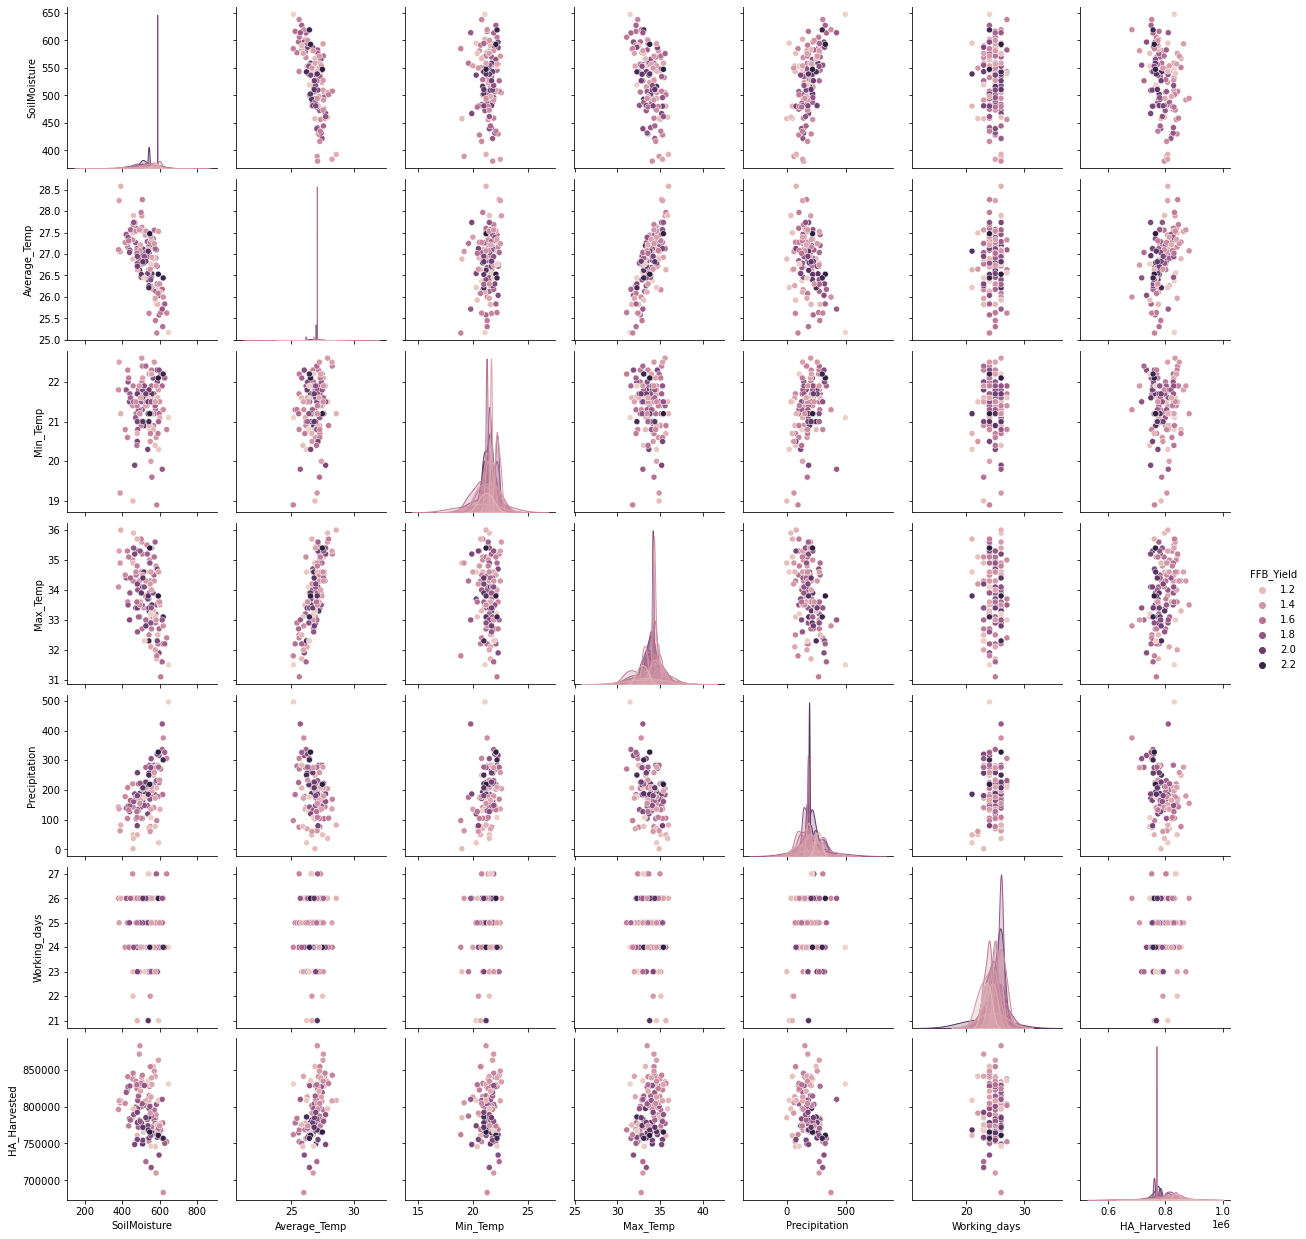

In [477]:
# Plot a scatter plot for every attribute pair

fig=plt.figure(figsize=(30,30))

#Pairplot is used to plot pairwise relationships in a dataset
sns.pairplot(df,hue='FFB_Yield', vars = ['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested'])

#All columns from the dataset is selected to plot these graphs so that users will have a better visualization

## Findings

The figure above is the scatter plot for every attributes with FFB_Yield. The features that has a high or low correlation can be easily identified from it. According to the plottings, it is seen that there are a colour hue difference. However, a plot legend is also shown on the right to represent low/high yield for each attribute pair as the scatter plots shows the relationship between the two variables. Next, it is obvious that there are a lot of subgraphs are formed by multiple straight lines, this is because the dataset has a lot of categorical data that consist of integer of only discrete variables.

<AxesSubplot:xlabel='HA_Harvested', ylabel='FFB_Yield'>

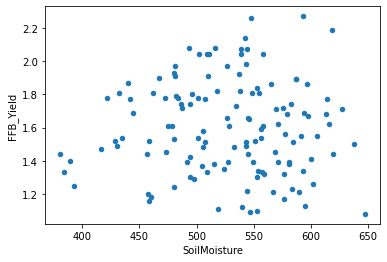

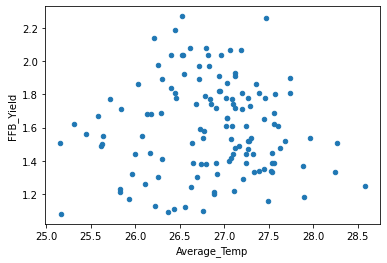

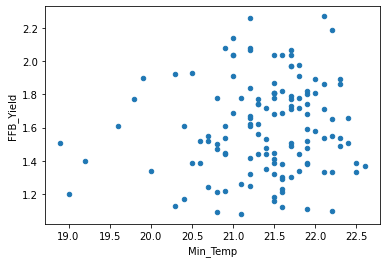

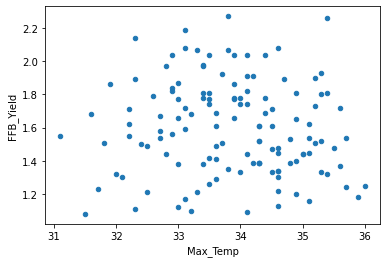

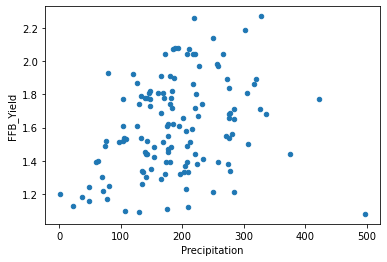

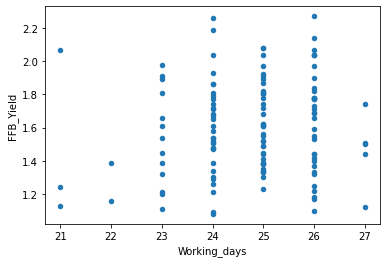

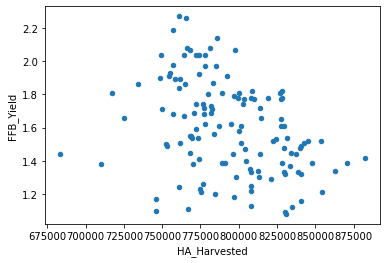

In [478]:
df.plot(kind='scatter',x='SoilMoisture',y='FFB_Yield')
df.plot(kind='scatter',x='Average_Temp',y='FFB_Yield')
df.plot(kind='scatter',x='Min_Temp',y='FFB_Yield')
df.plot(kind='scatter',x='Max_Temp',y='FFB_Yield')
df.plot(kind='scatter',x='Precipitation',y='FFB_Yield')
df.plot(kind='scatter',x='Working_days',y='FFB_Yield')
df.plot(kind='scatter',x='HA_Harvested',y='FFB_Yield')

In [479]:
# Extracting the target variable then create a useful feature list of 
# dependent variables

target = 'FFB_Yield'
features_list = list(df.columns)
features_list.remove(target)

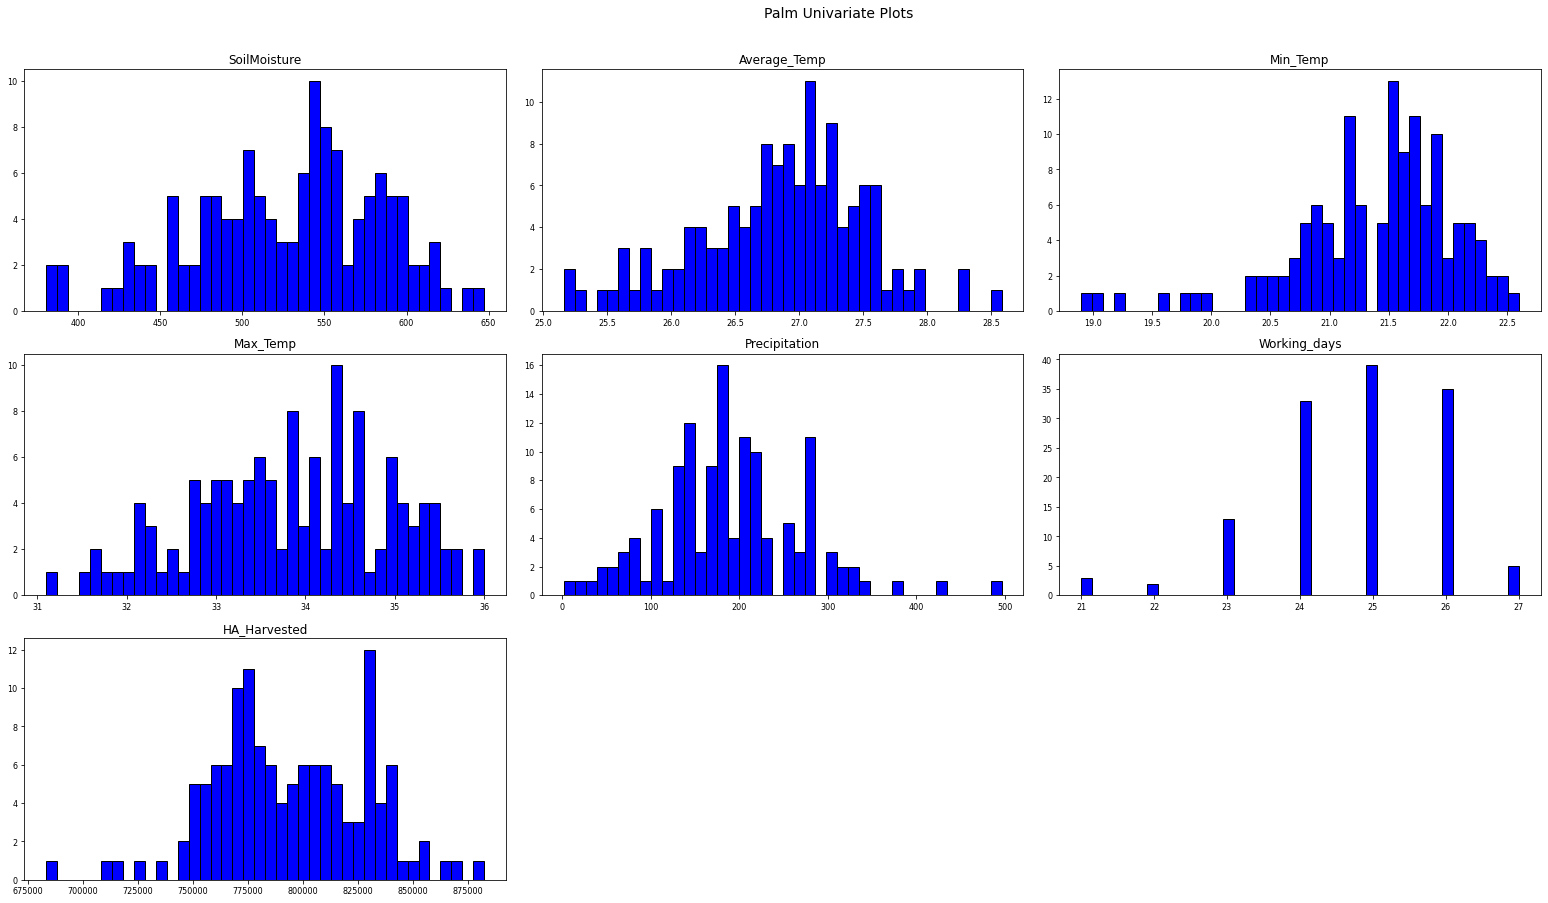

In [480]:
# Features Distribution

df[features_list].hist(bins=40, edgecolor='black', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(18,10), color='b')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Palm Univariate Plots', x=0.65, y=1.25, fontsize=14); 

## Findings

From the histogram above, we can notice that the continuous features are slightly left-skewed distributed while 'Precipitation' feature have a right-skewed distribution. As for the plots that have gaps in between like 'Working_days', it means that the variables are categorical. For a better result, it should be engineered into their log forms.

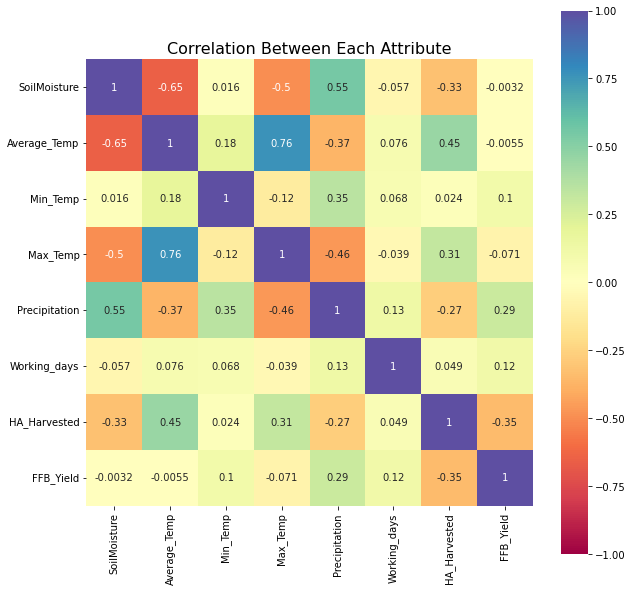

In [481]:
# Plot a heatmap to show the correlation between each attribute
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), vmax=1, vmin=(-1), square=True, annot=True, cmap = 'Spectral')
plt.title('Correlation Between Each Attribute', fontsize = 16)
plt.show()

## Findings

As seen on the above heatmap:
- It is noticeable that the highest correlated attributes are Average_Temp & Min_Temp, which scientifically does not make sense. Looking to the second highest correlated attributes, which is SoilMoisture & Precipitation and the lowest being SoilMoisture & Average_Temp.

- However, FFB_Yield is highly correlated with Precipitation and secondly Working_days.

## Data Modeling

In [482]:
# Import standard scaler and traintestsplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Divide the dataset into x and y as response variable and feature variable
X = df.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = df['FFB_Yield']    #target column i.e FFB_Yield

X.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested
0,616.4,25.306452,21.3,32.2,184.4,25,777778.3951
1,568.9,26.165517,20.9,35.1,140.2,23,767988.2759
2,577.6,25.448387,21.3,32.9,280.4,25,783951.9231
3,581.1,26.903333,20.6,34.8,173.3,25,788987.0504
4,545.4,27.241935,20.9,35.0,140.6,25,813659.7222


In [483]:
y.head()

0    1.62
1    1.45
2    1.56
3    1.39
4    1.44
Name: FFB_Yield, dtype: float64

For displaying X and y, we can know that the dataset have been successfully divided into x and y as response variable and feature variable.

Now to split the data to test and train, then apply the standard scaler to receive an optimized result.

In [484]:
# Split the data to test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Applying standard scaling to get optimized result
scaler = StandardScaler()

# Apply scaler
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

Now to look at the train and test set.

In [485]:
print(X_train)

            0         1         2         3         4         5         6
0    1.042690 -0.863096  0.908945 -1.457040  1.765361 -1.280306 -1.071676
1   -0.688866  0.082899  0.616734 -0.705486  0.474221  0.267971  0.576394
2    1.914535 -1.936603 -0.844322 -1.363096  1.579437  1.816249 -1.248185
3    1.543611 -2.435120 -0.113794 -1.550984  0.009410  0.267971 -0.496337
4    0.280043 -1.946777  0.470629 -1.269151 -1.408261  0.267971 -1.232252
..        ...       ...       ...       ...       ...       ...       ...
99   1.732539 -1.600867  1.055051 -1.550984  1.842829 -0.506168 -1.312914
100  0.444705 -0.710658 -0.259899 -0.893374  1.181766  1.042110 -0.998991
101 -0.205278 -0.095143  0.324523 -0.423653  0.521993  0.267971 -0.720673
102 -0.811929  0.435253 -1.282639  1.361289 -1.344996 -0.506168 -1.159895
103 -1.598843  0.718763  1.055051  1.173401 -0.656818 -0.506168 -0.617969

[104 rows x 7 columns]


In [486]:
print(X_test)

           0         1         2         3         4         5         6
0  -0.716598 -0.263010 -0.113794  0.140013 -0.698134  0.267971 -0.669657
1   0.363241  0.555982  0.178417  0.985512 -0.190716  0.267971  0.166261
2  -0.368207 -0.125664  0.908945 -1.081263  0.279259 -0.506168  0.168757
3   0.843362  0.433896  0.032312  1.643122  0.001664 -0.506168 -0.517150
4  -0.011150 -0.029013  0.470629 -0.987319  0.552980  1.042110 -0.285709
5  -0.591802 -0.363731 -0.259899 -0.705486  0.049436  0.267971 -0.394805
6   0.195112 -0.705572  0.178417 -0.893374  0.436778  1.042110 -0.604352
7  -0.543269  1.130802  0.762840  1.361289  0.497461  0.267971 -0.431234
8  -0.304076  0.423722  0.616734  0.233957 -0.238488  0.267971 -1.184221
9  -1.231385  0.754371  0.032312  1.079456  0.471639  1.816249  1.260194
10  0.931760 -0.171446  0.762840 -0.799430  1.172728  0.267971 -2.495451
11 -0.387273  1.638985  1.785579  1.643122  0.262474  1.042110  1.141449
12  0.000983  1.079933  0.178417  0.421846  0.31282

The data is now splitted to train and test data. The train set will be used to trained to find patterns, while the test set will be tested by using the patterns on the test set. 

## Random Forest Model
## Sequential Forward Floating Selection

In [487]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Sequential Forward Floating Selection
rfreg = sfs(RandomForestRegressor(),k_features=4,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
rfreg.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    2.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.5s finished

[2022-09-30 13:43:47] Features: 1/4 -- score: -0.13415277308975573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished

[2022-09-30 13:43:48] Features: 2/4 -- score: -0.16840501642276873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished

[2022-09-30 13:43:48] Features: 3/4 -- score: 0.09897802893111447[Parallel(n_jobs=-1)]: Using backen

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=(4, 4),
                          n_jobs=-1, scoring='r2', verbose=2)

In [488]:
print('\nSequential Forward Selection (k=4):')
rfreg.k_feature_idx_


Sequential Forward Selection (k=4):


(0, 4, 5, 6)

In [489]:
#Get the column name for the selected feature.
rfreg.k_feature_names_

('SoilMoisture', 'Precipitation', 'Working_days', 'HA_Harvested')

In [490]:
print('CV Score:')
print(rfreg.k_score_)

CV Score:
0.22642894704829658


## Sequential Backward Floating Selection

In [491]:
# Sequential Backward Floating Selection
rfregsb = sfs(RandomForestRegressor(),k_features=4,forward=False,verbose=2,cv=4,n_jobs=-1,scoring='r2')
rfregsb.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2022-09-30 13:43:49] Features: 6/4 -- score: 0.17390610898864411[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.3s finished

[2022-09-30 13:43:49] Features: 5/4 -- score: 0.1689126911281545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished

[2022-09-30 13:43:50] Features: 4/4 -- score: 0.18425903214044495

SequentialFeatureSelector(cv=4, estimator=RandomForestRegressor(),
                          forward=False, k_features=(4, 4), n_jobs=-1,
                          scoring='r2', verbose=2)

In [492]:
print('\nSequential Forward Selection (k=4):')
rfregsb.k_feature_idx_


Sequential Forward Selection (k=4):


(0, 3, 4, 6)

In [493]:
#Get the column name for the selected feature.
rfregsb.k_feature_names_

('SoilMoisture', 'Max_Temp', 'Precipitation', 'HA_Harvested')

In [494]:
print('CV Score:')
print(rfregsb.k_score_)

CV Score:
0.18425903214044495


## Findings

By comparing both of the floating selection, it is noticeable that SoilMoisture, Precipitation and HA_Harvested are the 3 most important feature for affecting the yield. 